In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier

In [2]:
X1, y1 = make_gaussian_quantiles(cov=2.0, n_samples=500, n_features=2, n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=400, n_features=2, n_classes=2, random_state=1)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2+1))

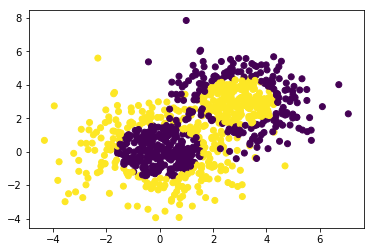

In [3]:
%matplotlib inline
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [4]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                        algorithm='SAMME', n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

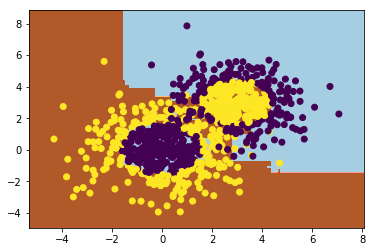

In [5]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [7]:
print("Score: ", bdt.score(X, y))

Score:  0.913333333333


In [8]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                        algorithm='SAMME', n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)
print('Score: ', bdt.score(X, y))

Score:  0.962222222222


In [9]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                        algorithm='SAMME', n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print('Score: ', bdt.score(X, y))

Score:  0.894444444444


In [10]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                        algorithm='SAMME', n_estimators=700, learning_rate=0.7)
bdt.fit(X, y)
print('Score: ', bdt.score(X, y))

Score:  0.968888888889
